<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>

* [1. IMPORTING LIBRARIES](#1)
* [2. LOADING DATA](#2)    
* [3. DATA PIPELINE](#3) (Maleable section)
* [4. EXPLORATORY DATA ANALYSIS](#4)     
* [5. MODELING](#5)
* [6. EVALUATION](#6)
* [7. DISCUSSION](#7)  
* [8. DEPLOYMENT AND ENSEMBLES](#8)
* [9. END](#9)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [1]:
# Parameters
path_root = "/home/magody/programming/python/data_science/"
path_data = f"{path_root}data/IBM/"
path_output = f"{path_root}output/"

In [2]:
import sys
sys.path.append(f"{path_root}lib")

from insight import * # type: ignore
from utils_math import * # type: ignore
from utils_pandas import * # type: ignore
from evaluation import * # type: ignore

2022-02-06 09:33:31.742967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-06 09:33:31.743004: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [192]:
#Importing the Libraries
from typing import Union        # type hints
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering




# machine learning
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import naive_bayes
from sklearn import gaussian_process
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import feature_selection
from xgboost import XGBClassifier
    
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

# Hypertunning libraries
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold, KFold
pd.options.mode.chained_assignment = None  # default='warn'

<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

## Description

Each time a client applies for a loan from a financial institution, several internal processes and controls are activated, which are necessary for the evaluation of the application received. In this way, a lot of information related to the client's profile, credit destination, work activity, income, housing conditions, among other demographic data, is analyzed manually.

In addition, the institution makes use of the so-called credit bureau to learn about the client's credit history in order to define his credit profile. Together with other credit histories, information from other loans, level of compliance and behavior in their contracted products, the institution approves an amount to be lent and a term for repayment, or rejects the application.

https://github.com/maratonadev/desafio-1-2021/blob/main/doc/instructions/es.md

```
[
  "ID",                             # Número identificador del cliente
  "CHECKING_BALANCE",               # Saldo que posee el cliente en su cuenta corriente
  "PAYMENT_TERM",                   # Cantidad de días que el cvliente posee para pagar el préstamo
  "CREDIT_HISTORY",                 # Situación crediticia pasada del cliente
  "LOAN_PURPOSE",                   # Motivo del préstamo
  "LOAN_AMOUNT",                    # Monto del préstamo
  "EXISTING_SAVINGS",               # Saldo de cuenta de ahorros
  "EMPLOYMENT_DURATION",            # Cuántos años ha permanecido el cliente en su empleo
  "INSTALLMENT_PERCENT",            # Cantidad de cuotas en las que el préstamo debe ser pagado
  "SEX",                            # Sexo del cliente
  "OTHERS_ON_LOAN",                 # Denota la existencia de un garante u otro solicitante del préstamo
  "CURRENT_RESIDENCE_DURATION",     # Años que el cliente ha permanecido en su última residencia
  "PROPERTY",                       # Indica si el cliente posee alguna propiedad a su nombre
  "AGE",                            # Edad del cliente
  "INSTALLMENT_PLANS",              # Plan de financiamiento, que puede ser del banco, externo o ninguno
  "HOUSING",                        # Indica si el cliente posee una casa propia
  "EXISTING_CREDITS_COUNT",         # Número de préstamos que le han sido concedidos al cliente en el pasado
  "JOB_TYPE",                       # Tipo de empleo: 0 - desempleado, 1 - no calificado, 2 - autónomo, 3 - calificado
  "DEPENDENTS",                     # Número de personas con acceso a la cuenta
  "TELEPHONE",                      # Denota si el cliente tiene un número de teléfono registrado
  "FOREIGN_WORKER"                  # Denota si el cliente trabaja en un país fuera del banco
]
```

## Load

In [4]:
#Loading the dataset
ACCOUNTS: pd.DataFrame = pd.read_csv(f"{path_data}ACCOUNTS.csv")
DEMOGRAPHICS: pd.DataFrame = pd.read_csv(f"{path_data}DEMOGRAPHICS.csv")
LOANS: pd.DataFrame = pd.read_csv(f"{path_data}LOANS.csv")

print(ACCOUNTS.columns)
print(DEMOGRAPHICS.columns)
print(LOANS.columns)

data =  ACCOUNTS.join(DEMOGRAPHICS.set_index("ID"), on='ID', how='left').join(LOANS.set_index("ID"), on='ID', how='left')
del ACCOUNTS, DEMOGRAPHICS, LOANS
data.info()

Index(['ID', 'CHECKING_BALANCE', 'CREDIT_HISTORY', 'EXISTING_SAVINGS',
       'EXISTING_CREDITS_COUNT'],
      dtype='object')
Index(['ID', 'SEX', 'AGE', 'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE',
       'FOREIGN_WORKER', 'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
       'CURRENT_RESIDENCE_DURATION'],
      dtype='object')
Index(['ID', 'PAYMENT_TERM', 'INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'ALLOW'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2477 non-null   int64  
 1   CHECKING_BALANCE            2467 non-null   object 
 2   CREDIT_HISTORY              2462 non-null   object 
 3   EXISTING_SAVINGS            2467 non-null   object 
 4   EXISTING_CREDITS_COUNT      2463 non-null   float64
 5   SEX 

<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PIPELINE</p>
- Special section: is used before and after by the following sections. Isn't in the common sequential flow.
- Maleable section.
- Here we define a pipeline for cleaning, preprocessing, dimensionality reduction, feature enginering, etc. That can be modified at any time for other following steps.
- Commonly, we use the insights got in EDA for write this part.

In [5]:
# Basic cleaning for consuming
import math

class PA:
    # Pipeline Actions
    DROP = 0
    TYPECAST = 1
    SCALE = 2
    REPLACE = 3
    RENAME = 4
    REPLACE_WITH_MODE = 5
    REPLACE_WITH_MEDIAN = 6
    RENAME_LOWER_CASE = 7

    PIPELINE_BASE_COMMON_INT = [
        [REPLACE_WITH_MEDIAN,[np.nan]], 
        [TYPECAST,np.int16],
        [RENAME_LOWER_CASE],
    ]

    PIPELINE_BASE_COMMON_MODE_INT = [
        [REPLACE_WITH_MODE,[np.nan]],
        [TYPECAST,np.int16],
        [RENAME_LOWER_CASE],
    ]

    @staticmethod
    def is_real_number(x):
        try:
            cast_x = float(x)
            if math.isnan(cast_x):
                return False
            else:
                return True
        except:
            return False

    @staticmethod
    def exec(df: pd.DataFrame, data_scheme:dict):
        df_result: pd.DataFrame = df.copy()

        columns = df.columns
        for column in columns:
            try:
                pipeline_actions = data_scheme.get(column,[])
                
                for pa_group in pipeline_actions:
                    pa = pa_group[0]

                    if pa == PA.DROP:
                        df_result.drop(column, axis=1,inplace=True)
                    elif pa == PA.REPLACE:
                        map_replace = {}
                        for key,value in zip(pa_group[1],pa_group[2]):
                            map_replace[key] = value

                        df_result[column].replace(map_replace, inplace=True)
                    elif pa == PA.TYPECAST:
                        df_result[column] = df_result[column].astype(pa_group[1])

                    elif pa == PA.REPLACE_WITH_MODE:
                        mode = df_result[df_result[column].notna()][column].mode()[0]
                        map_replace = {}
                        for key in pa_group[1]:
                            map_replace[key] = mode
                        df_result[column].replace(map_replace, inplace=True)

                    elif pa == PA.REPLACE_WITH_MEDIAN:
                        # works even if exist text in the column
                        median = df_result[df_result[column].apply(PA.is_real_number)][column].median()
                        map_replace = {}
                        for key in pa_group[1]:
                            map_replace[key] = median
                        df_result[column].replace(map_replace, inplace=True)
                    elif pa == PA.RENAME:
                        df_result.rename(columns={column: pa_group[1]}, inplace=True)
                    elif pa == PA.RENAME_LOWER_CASE:
                        df_result.rename(columns={column: column.lower()}, inplace=True)

            except Exception as e:
                print(f"Error while processing column '{column}': {e}")


        return df_result


In [202]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy
from scipy import stats

class PipelineData:
    
    def __init__(self, DATA_SCHEME:dict, cols_categorical:list, cols_scale:list, dimension_reduction_to=-1) -> None:        
        self.dimension_reduction_to = dimension_reduction_to
        # Not include columns that will appear in feature engineering
        self.DATA_SCHEME = DATA_SCHEME
        # Include the cols that will appear in featureEngineering
        self.cols_categorical = cols_categorical
        self.cols_scale = cols_scale

    def bucket(self, df_colum:pd.DataFrame, bins, labels=None, dtype=None):
        # bins = [0, 500, 1000, 2000, 3300, 5000, 10000, np.inf]

        if labels is None:
            labels = [i for i in range(len(bins)-1)]

        serie:pd.Series = pd.cut(df_colum, bins=bins, labels=labels)
        if dtype is not None:
            serie = serie.astype(dtype)
        return serie
        
    def featureEngineering(self, data:pd.DataFrame):
        # CODE HERE
        return data

    def processCategorical(self, data:pd.DataFrame):
        #Get list of categorical variables
        # LE=LabelEncoder() object dtypes
        # One hot

        cols = data.columns

        for col in self.cols_categorical:
            pre = col
            if col in cols:
                data = data.join(pd.get_dummies(data[col], prefix=pre))
                data.drop(col, axis=1, inplace=True)

        return data

    def processOutliers(self, data:pd.DataFrame):
        # Z-SCORE
        try:
            return data[(np.abs(stats.zscore(data.loc[:, self.cols_scale])) <= 3).all(axis=1)]
        except:
            return data[(np.abs(stats.zscore(data.loc[:, data.columns])) <= 3).all(axis=1)]

    def scaleData(self, data:pd.DataFrame):
        
        #Scaling
        scaler = StandardScaler()
        try:
            data[self.cols_scale] = scaler.fit_transform(data[self.cols_scale])
            return data
        except:
            columns = data.columns.to_numpy()
            print(columns, type(data))
            data[columns] = scaler.fit_transform(data[columns])
            return data


    def reduceDimension(self, data:pd.DataFrame):
        # Usually PCA or feature importance with random forests

        if self.dimension_reduction_to == -1:
            return data

        #Initiating PCA to reduce dimentions aka features to 3
        pca = PCA(n_components=self.dimension_reduction_to)
        pca.fit(data)

        columns = [f"col{i}" for i in range(1,self.dimension_reduction_to+1)]

        PCA_ds = pd.DataFrame(pca.transform(data), columns=(columns))
        return PCA_ds

    def base(self,data:pd.DataFrame):
        return PA.exec(data, self.DATA_SCHEME)
        
    def transform(self, data, target=["target"], is_training=True, create_copy=True, apply_base=True):
        
        if create_copy:
            data_clean = data.copy()
            
            if apply_base:
                data_clean = self.base(data_clean)

            data_clean = self.featureEngineering(data_clean)
            data_clean = self.processCategorical(data_clean)
            if is_training:
                data_clean = self.processOutliers(data_clean)
            data_clean = self.scaleData(data_clean)

            if is_training:
                X = data_clean.drop(target, axis=1)
                y = data_clean.loc[:,target]
                X = self.reduceDimension(X)
                return X, y
            else:
                data_clean = self.reduceDimension(data_clean)
                return data_clean
        else:
            if apply_base:
                data = self.base(data)
            data = self.featureEngineering(data)
            data = self.processCategorical(data)
            if is_training:
                data = self.processOutliers(data)
            data = self.scaleData(data)


            if is_training:
                X = data.drop(target, axis=1)
                y = data.loc[:,target]
                X = self.reduceDimension(X)
                return X, y
            else:
                data = self.reduceDimension(data)
                return data



# base
DATA_SCHEME_BASE = {
    "ID":[
        [PA.DROP],
    ],
    "CHECKING_BALANCE":[
        [PA.REPLACE,[np.nan,"NO_CHECKING"],[0,0]],
        [PA.TYPECAST,np.float],
        [PA.RENAME_LOWER_CASE],
    ],
    "CREDIT_HISTORY": [
        [PA.REPLACE_WITH_MODE,[np.nan]],  
        [PA.RENAME_LOWER_CASE],      
    ],
    "EXISTING_SAVINGS": [
        [PA.REPLACE,[np.nan],[0]],
        [PA.REPLACE_WITH_MEDIAN,["UNKNOWN"]],
        [PA.TYPECAST,np.float],
        [PA.RENAME_LOWER_CASE],
    ],
    "EXISTING_CREDITS_COUNT": [
        [PA.REPLACE,[np.nan],[0]],
        [PA.TYPECAST,np.int16],
        [PA.RENAME_LOWER_CASE],
    ],
    "SEX": [
        [PA.REPLACE_WITH_MODE,[np.nan]],   
        [PA.REPLACE,["F","M"],[0,1]],
        [PA.TYPECAST,np.int16],
        [PA.RENAME_LOWER_CASE],
    ],
    "AGE": PA.PIPELINE_BASE_COMMON_INT,
    "JOB_TYPE": [
        [PA.REPLACE_WITH_MODE,[np.nan]],
        [PA.TYPECAST,np.int16],
        [PA.RENAME_LOWER_CASE],
    ],
    "DEPENDENTS": PA.PIPELINE_BASE_COMMON_INT,
    "TELEPHONE": PA.PIPELINE_BASE_COMMON_MODE_INT,
    "FOREIGN_WORKER": PA.PIPELINE_BASE_COMMON_MODE_INT,
    "EMPLOYMENT_DURATION": PA.PIPELINE_BASE_COMMON_INT,
    "PROPERTY": [
        [PA.REPLACE,[np.nan],["UNKNOWN"]],
        [PA.RENAME_LOWER_CASE],
    ],
    "HOUSING": [
        [PA.REPLACE_WITH_MODE,[np.nan]],
        [PA.RENAME_LOWER_CASE],
    ],
    "CURRENT_RESIDENCE_DURATION": PA.PIPELINE_BASE_COMMON_INT,
    "PAYMENT_TERM": [
        [PA.REPLACE_WITH_MEDIAN,[np.nan]], 
        [PA.TYPECAST,np.float],
        [PA.RENAME_LOWER_CASE],
    ],
    "INSTALLMENT_PLANS": [
        [PA.REPLACE,[np.nan],["NONE"]],
        [PA.RENAME_LOWER_CASE],
    ],
    "INSTALLMENT_PERCENT": PA.PIPELINE_BASE_COMMON_INT,
    "LOAN_PURPOSE": [
        [PA.REPLACE,[np.nan],["OTHER"]],
        [PA.RENAME_LOWER_CASE],
    ],
    "LOAN_AMOUNT": [
        [PA.REPLACE_WITH_MEDIAN,[np.nan]], 
        [PA.TYPECAST,np.float],
        [PA.RENAME_LOWER_CASE],
    ],
    "OTHERS_ON_LOAN": [
        [PA.REPLACE,[np.nan],["NONE"]],
        [PA.RENAME_LOWER_CASE],
    ],
    "ALLOW": [
        [PA.TYPECAST,np.int16],
        [PA.RENAME_LOWER_CASE],
    ]
}
columns_one_hot = [
    "credit_history","job_type","property",
    "housing", "installment_plans", "loan_purpose",
    "others_on_loan"
]
columns_scale = [
    "checking_balance","existing_credits_count","age",
    "dependents","employment_duration","current_residence_duration",
    "payment_term", "installment_percent", "loan_amount", "existing_savings",
]
pipeline = PipelineData(DATA_SCHEME_BASE,columns_one_hot,columns_scale,dimension_reduction_to=-1)

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

In [26]:
data_base = pipeline.base(data) # if data is high, we have to sample a portion only

## Exploration and understanding for consumption

In [12]:
df_analisis = exploreSurface(data)
df_analisis.to_csv(f"{path_output}analisis.csv", index=True)
df_analisis.head()

,type1,type2,porc_unique,problem,unique_values
CHECKING_BALANCE,mix,unknown,0.565869,Is numerical but has text in middle,[]
CREDIT_HISTORY,categorical,text,0.00203087,,"[ALL_CREDITS_PAID_BACK, CREDITS_PAID_TO_DATE, ..."
EXISTING_SAVINGS,useless,unknown,0.907175,"High variability, better drop this",[]
EXISTING_CREDITS_COUNT,categorical,numeric,0.00121803,,"[1, 2, 3]"
SEX,categorical,text,0.000810701,,"[F, M]"


In [38]:
miss_numerical, miss_categorical, duplicates = getMissingAndDuplicates(data)
print("NUM", miss_numerical)
print("CAT",miss_categorical)
print("DUP",duplicates)

NUM [('EXISTING_CREDITS_COUNT', 0.0056519983851432976), ('AGE', 0.004844570044408525), ('JOB_TYPE', 0.005248284214775967), ('DEPENDENTS', 0.00645942672587807), ('TELEPHONE', 0.005248284214775967), ('FOREIGN_WORKER', 0.0056519983851432976), ('EMPLOYMENT_DURATION', 0.002018570851836876), ('CURRENT_RESIDENCE_DURATION', 0.0032297133629390906), ('PAYMENT_TERM', 0.006863140896245512), ('INSTALLMENT_PERCENT', 0.007266855066612843), ('LOAN_AMOUNT', 0.004440855874041194)]
CAT [('CHECKING_BALANCE', 0.004037141703673752), ('CREDIT_HISTORY', 0.006055712555510739), ('EXISTING_SAVINGS', 0.004037141703673752), ('SEX', 0.004037141703673752), ('PROPERTY', 0.004844570044408525), ('HOUSING', 0.004844570044408525), ('INSTALLMENT_PLANS', 0.006055712555510739), ('LOAN_PURPOSE', 0.004037141703673752), ('OTHERS_ON_LOAN', 0.005248284214775967)]
DUP [('CHECKING_BALANCE', 0.4323778764634639), ('CREDIT_HISTORY', 0.9919257165926524), ('EXISTING_SAVINGS', 0.09245054501413), ('SEX', 0.9951554299555915), ('PROPERTY',

In [23]:
data[data["CHECKING_BALANCE"].apply(is_real_number)].head()

,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
ID,,,,,,,,,,,,,,,,,,,,,
291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,F,24.0,3.0,1.0,1.0,1.0,...,SAVINGS_INSURANCE,OWN,2.0,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,1
657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0,F,30.0,3.0,1.0,0.0,1.0,...,CAR_OTHER,RENT,1.0,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,1
1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,M,28.0,1.0,1.0,0.0,1.0,...,CAR_OTHER,OWN,3.0,403.0,BANK,3.0,FURNITURE,2577.0,NONE,1
544178,-121.7,CREDITS_PAID_TO_DATE,22.44,1.0,M,26.0,3.0,1.0,0.0,1.0,...,SAVINGS_INSURANCE,RENT,3.0,480.0,NONE,2.0,FURNITURE,250.0,NONE,1
356107,-124.51,ALL_CREDITS_PAID_BACK,35.07,1.0,F,20.0,3.0,1.0,0.0,1.0,...,SAVINGS_INSURANCE,OWN,1.0,360.0,STORES,1.0,CAR_USED,250.0,NONE,1


In [14]:
# todo: doc to insights
def get_no_numbers(data, column):
    return np.unique(data[~data[column].apply(is_real_number) & data[column].notna()][column])

In [15]:
get_no_numbers(data, "CHECKING_BALANCE")

array(['NO_CHECKING'], dtype=object)

In [16]:
get_no_numbers(data, "EXISTING_SAVINGS")

array(['UNKNOWN'], dtype=object)

In [30]:
PA.exec(data,DATA_SCHEME_BASE).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CHECKING_BALANCE            2477 non-null   float64
 1   CREDIT_HISTORY              2477 non-null   object 
 2   EXISTING_SAVINGS            2477 non-null   float64
 3   EXISTING_CREDITS_COUNT      2477 non-null   int16  
 4   SEX                         2477 non-null   int16  
 5   AGE                         2477 non-null   int16  
 6   JOB_TYPE                    2477 non-null   float64
 7   DEPENDENTS                  2477 non-null   int16  
 8   TELEPHONE                   2477 non-null   int16  
 9   FOREIGN_WORKER              2477 non-null   int16  
 10  EMPLOYMENT_DURATION         2477 non-null   int16  
 11  PROPERTY                    2477 non-null   object 
 12  HOUSING                     2477 non-null   object 
 13  CURRENT_RESIDENCE_DURATION  2477 

## Visualization of data prepared for consumption

### Check possible imbalanced

<AxesSubplot:xlabel='allow', ylabel='count'>

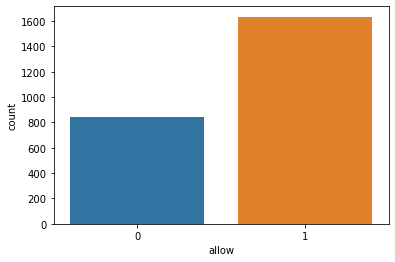

In [49]:
sns.countplot(x="allow",data=pipeline.data)

### See distribution

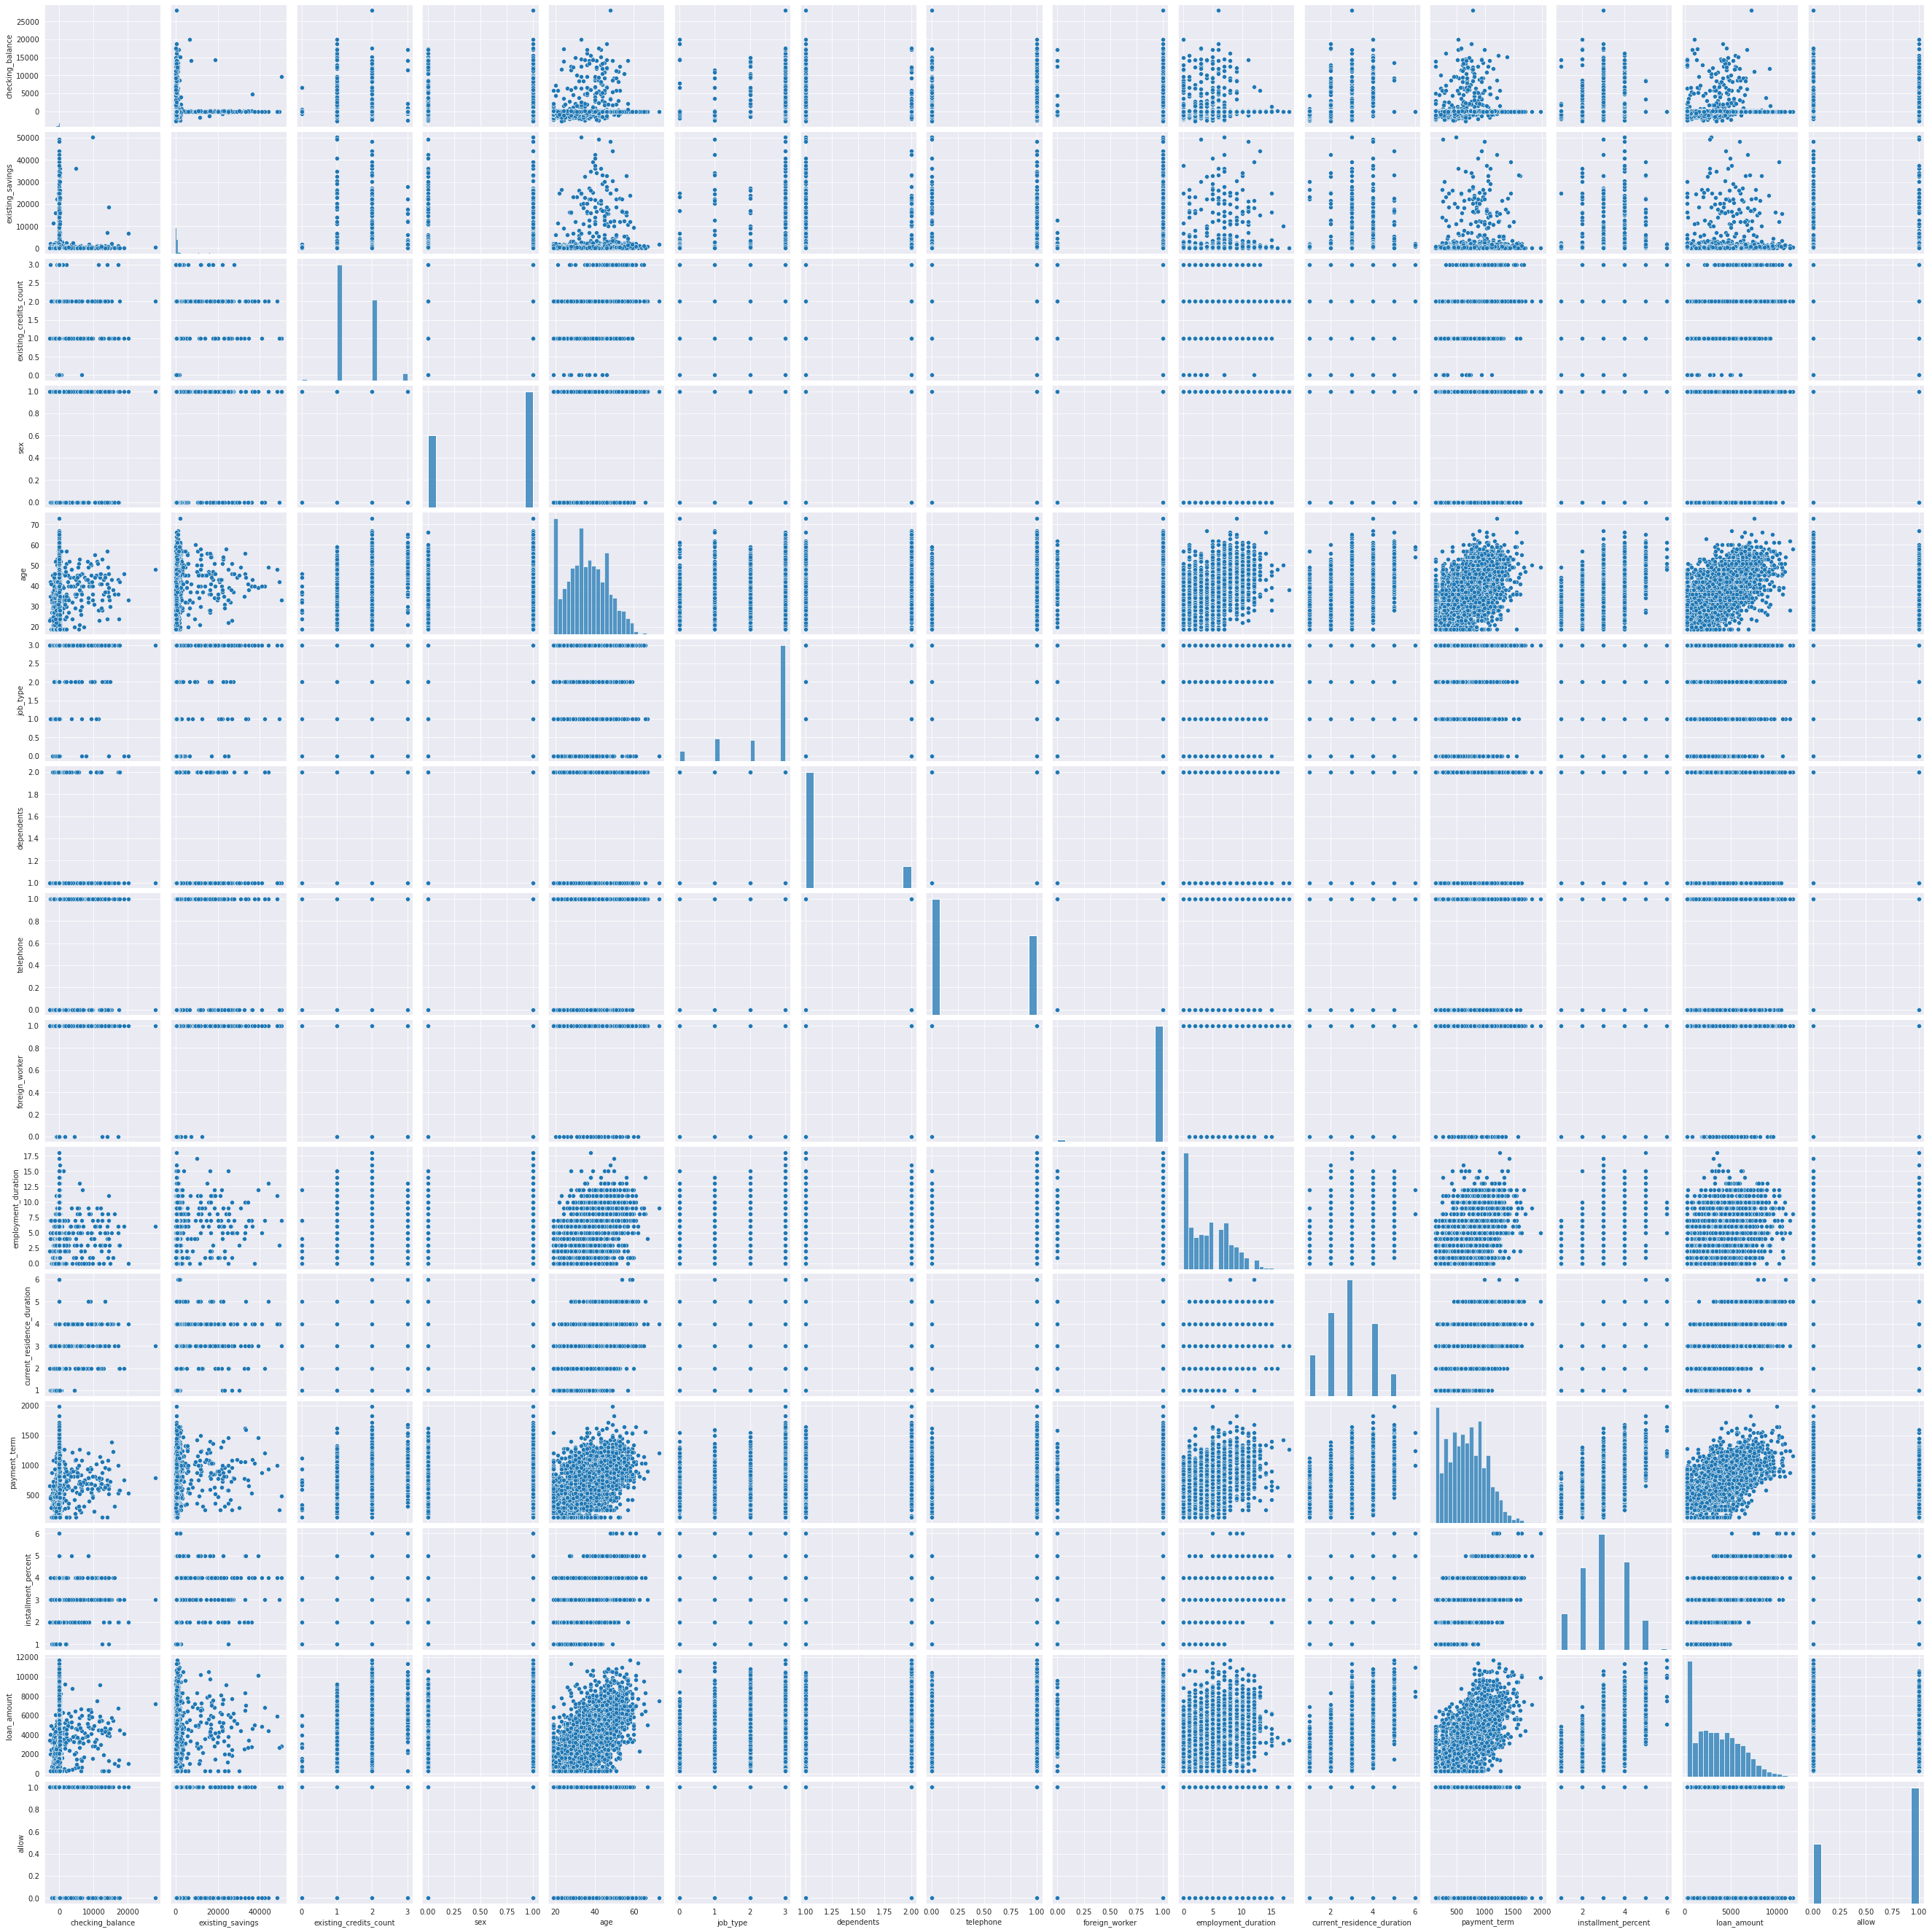

In [51]:
sns.pairplot(pipeline.data)

### Search outliers

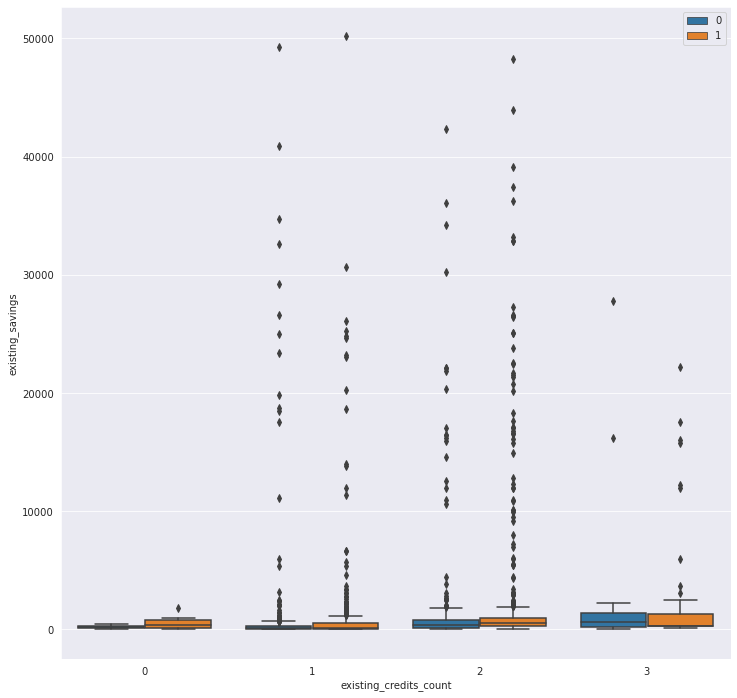

In [50]:
plt.figure(figsize=(12,12))
sns.set_style("darkgrid")
sns.boxplot(x="existing_credits_count",y="existing_savings",hue="sex",data=pipeline.data)
plt.legend(loc=0)

### Pivoting

In [12]:
data_base.describe()

,checking_balance,existing_savings,existing_credits_count,sex,age,job_type,dependents,telephone,foreign_worker,employment_duration,current_residence_duration,payment_term,installment_percent,loan_amount,allow
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.00000,2477.000000,2477.000000,2477.000000,2477.000000,2477.00000,2477.000000,2477.000000,2477.000000,2477.00000,2477.000000
mean,309.388236,1281.540448,1.461445,0.616875,35.91845,2.419055,1.159467,0.407751,0.976181,4.20872,2.859104,659.253936,2.987485,3479.85547,0.659669
std,2169.859850,4591.656983,0.578131,0.486246,10.50251,0.942409,0.366185,0.491516,0.152516,3.61769,1.099976,340.333517,1.119769,2497.25381,0.473916
min,-2797.250000,0.000000,0.000000,0.000000,19.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,120.000000,1.000000,250.00000,0.000000
25%,-40.700000,68.100000,1.000000,0.000000,28.00000,2.000000,1.000000,0.000000,1.000000,1.00000,2.000000,390.000000,2.000000,1367.00000,0.000000
50%,0.000000,262.920000,1.000000,1.000000,36.00000,3.000000,1.000000,0.000000,1.000000,4.00000,3.000000,651.000000,3.000000,3206.00000,1.000000
75%,35.620000,694.620000,2.000000,1.000000,43.00000,3.000000,1.000000,1.000000,1.000000,7.00000,4.000000,900.000000,4.000000,5257.00000,1.000000
max,28041.160000,50177.310000,3.000000,1.000000,73.00000,3.000000,2.000000,1.000000,1.000000,18.00000,6.000000,1984.000000,6.000000,11676.00000,1.000000


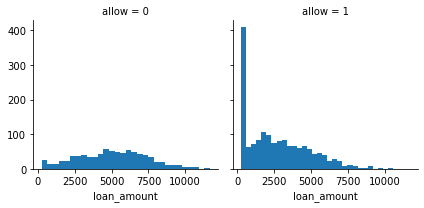

In [13]:
g = sns.FacetGrid(data_base, col='allow')
g.map(plt.hist, 'loan_amount', bins=30)
plt.show()

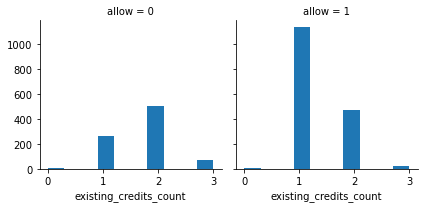

In [17]:
g = sns.FacetGrid(data_base, col='allow')
g.map(plt.hist, 'existing_credits_count')
plt.show()

In [18]:

for c in pipeline.cols_categorical:
    print(data_base[[c, 'allow']].groupby(c, as_index=False).mean().sort_values('allow', ascending=False))

           credit_history     allow
2              NO_CREDITS  1.000000
0   ALL_CREDITS_PAID_BACK  0.925333
1    CREDITS_PAID_TO_DATE  0.780690
4  PRIOR_PAYMENTS_DELAYED  0.586327
3      OUTSTANDING_CREDIT  0.339956
   job_type     allow
0         0  0.787097
1         1  0.750751
3         3  0.640095
2         2  0.603896
            property     allow
1        REAL_ESTATE  0.947368
2  SAVINGS_INSURANCE  0.728691
0          CAR_OTHER  0.588699
3            UNKNOWN  0.251351
  housing     allow
2    RENT  0.882012
1     OWN  0.674564
0    FREE  0.269663
  installment_plans     allow
0              BANK  0.845528
2            STORES  0.770588
1              NONE  0.600232
   loan_purpose     allow
2       CAR_NEW  0.865096
9    RETRAINING  0.728395
3      CAR_USED  0.719697
5     FURNITURE  0.682152
10     VACATION  0.675439
1      BUSINESS  0.661972
4     EDUCATION  0.637500
7      RADIO_TV  0.571038
0    APPLIANCES  0.477663
8       REPAIRS  0.433566
6         OTHER  0.372881
  other

/home/magody/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_history', ylabel='count'>

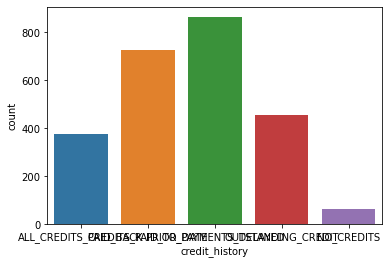

In [19]:
sns.countplot(data_base["credit_history"])

### Correlation

<AxesSubplot:>

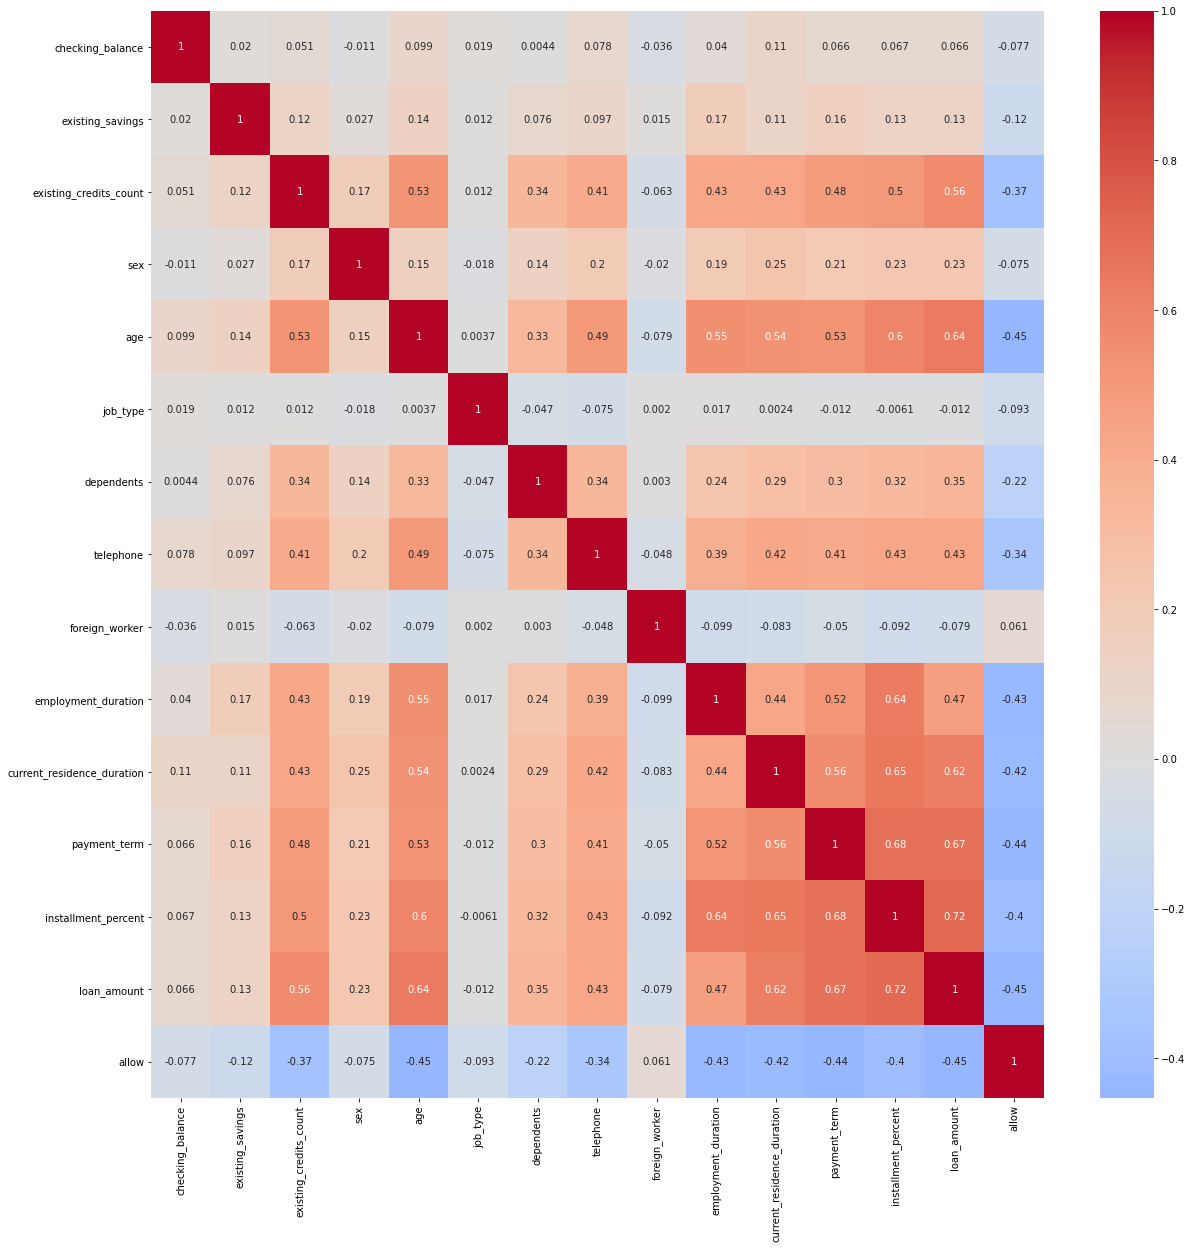

In [9]:
#correlation matrix
corrmat= data_base.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap="coolwarm", center=0)

<AxesSubplot:>

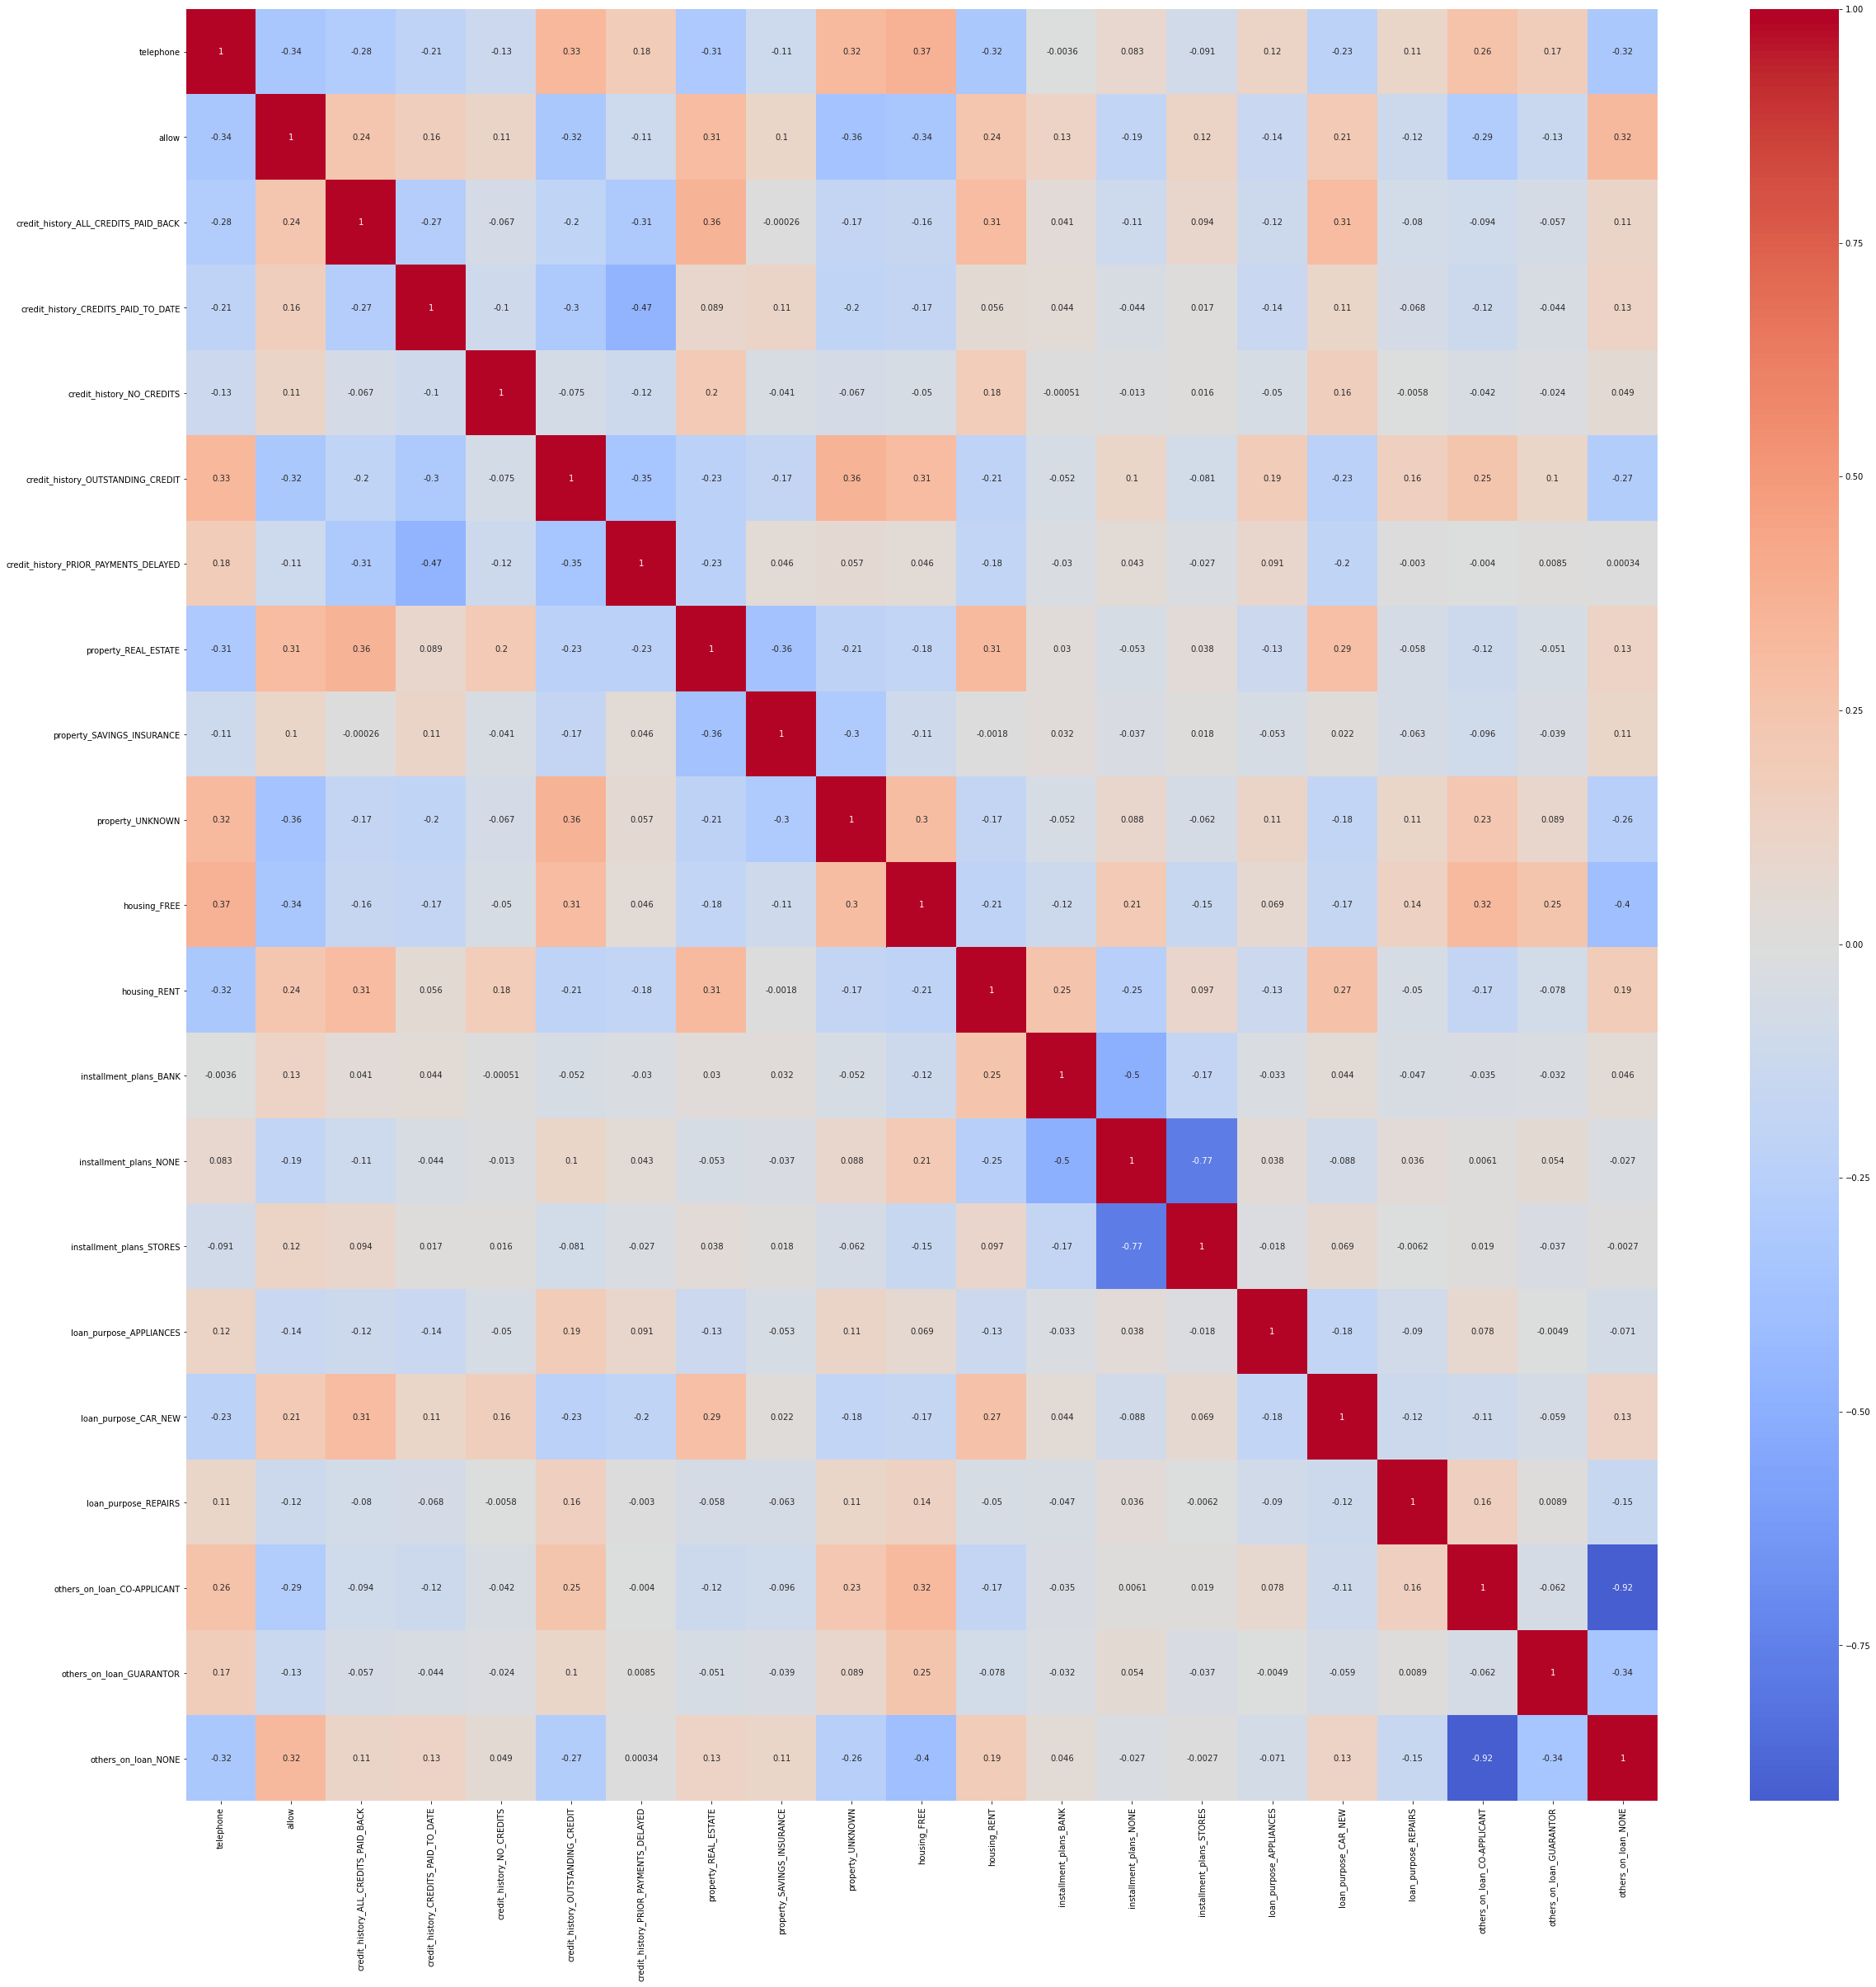

In [64]:
#correlation matrix
corrmat= pipeline.transform(data,target=["allow"],is_training=False).drop(columns=pipeline.cols_scale).corr()
corr_irrelevant = corrmat[corrmat["allow"].apply(lambda c: abs(c) < 0.1)].index.to_numpy()
corrmat = corrmat.drop(columns=corr_irrelevant)
corrmat = corrmat.drop(index=corr_irrelevant)
plt.figure(figsize=(40,40))
sns.heatmap(corrmat,annot=True, cmap="coolwarm", center=0)

In [10]:
pipeline.cols_categorical

['credit_history',
 'job_type',
 'property',
 'housing',
 'installment_plans',
 'loan_purpose',
 'others_on_loan']

- loan_amount (existing_credit_count: [-0.37,0.56], dependents: [-0.22,0.35], telephone: [-0.34,0.43], correlated: age 0.64, installment_percent 0.72, payment_term 0.67, current_residence_duration 0.62, employment_duration [-0.43,0.47])
- property_UNKNOWN: -0.36 (housing_FREE: [-0.34,0.3])
- foreign_worker: [0.061]
- job_type: [-0.09] <- is categorical...
- sex: [-0.075]
- existing_savings: [-0.12]
- checking_balance: [-0.077]

### Dimensionality reduction

#### PCA
- Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [58]:
n_components = 3 # reduce to this dimensions
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(pipeline.)
PCA_ds = pd.DataFrame(pca.transform(X_EDA), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.429437e-16,2.878377,-5.969395,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-9.435892e-18,1.706839,-4.312184,-1.328304,-0.158030,1.242265,6.142645
col3,2212.0,7.260116e-17,1.221956,-3.530763,-0.828709,-0.022538,0.799510,6.615153


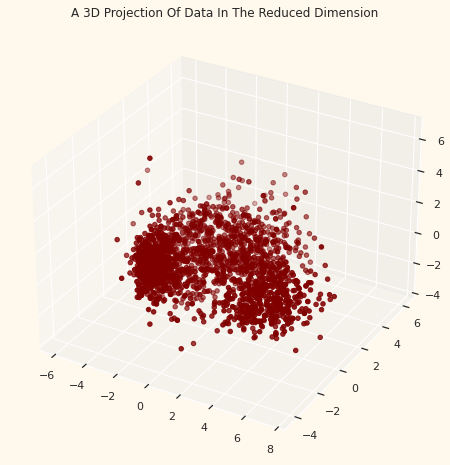

In [59]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Insights
- 


<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODELING</p>

## Baseline

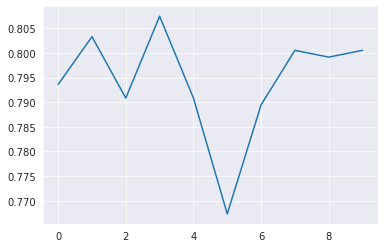

In [125]:
# result using all dimensions, no dimensionality reduction
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
model0 = linear_model.LogisticRegressionCV(max_iter=1000)

results_cv = model_selection.cross_validate(model0, X.to_numpy(), y["allow"].to_numpy(), cv  = cv_split)
plt.plot(results_cv["test_score"])


In [142]:
model0.fit(X_train,y_train.reshape((len(y_train),)))
print(model0.score(X_test,y_test.reshape((len(y_test),))))

0.8036605657237936


## Check that model can predict labels

In [108]:
pipeline.dimension_reduction_to = -1
# X, y = pipeline.transform(data_base.loc[:,["loan_amount"]],target=["allow"],is_training=True,create_copy=False,apply_base=False)
amount = 10
X = pipeline.processOutliers(data_base)
y = X.loc[:,["allow"]]
X = pipeline.scaleData(X.loc[:,["loan_amount"]])
X = X.iloc[0:amount,:]
y = y.iloc[0:amount,:]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.to_numpy(), y.to_numpy(), shuffle=True)
print(X_train.shape, X_test.shape)
# result using all dimensions, no dimensionality reduction
model_check = linear_model.LogisticRegressionCV(max_iter=1000)
model_check.fit(X_train,y_train.reshape((len(y_train),)))
print(model_check.score(X_test,y_test.reshape((len(y_test),)))) # expected near to 100%

(7, 1) (3, 1)
1.0


/home/magody/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


## Improving base line by feature enginering

baseline: 0.7414 [loan_amount_band],0.7620 with ["property_UNKNOWN"]

In [278]:
y_all.head()

,allow
0,1
1,1
2,0
3,1
4,1


In [288]:
from sklearn.mixture import GaussianMixture

pipeline.dimension_reduction_to = -1
X_all = pipeline.transform(data,is_training=False,apply_base=True)
y_all = X_all.loc[:,["allow"]].to_numpy()
X_all = X_all.drop(columns=["allow"]).to_numpy()

lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']
best_s = ""

for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X_all)
        bic.append(gmm.aic(X_all))
        
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            best_s = f"{cv_type}, {n_components}"
            
best_gmm.fit(X_all)

print(best_s)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, shuffle=True)

gmm_X_train = best_gmm.predict_proba(X_train)
gmm_X_test = best_gmm.predict_proba(X_test)


full, 4


In [289]:
gmm_X_train[0]

array([2.73690366e-03, 0.00000000e+00, 9.97263096e-01, 1.29070421e-30])

In [260]:
pipeline.dimension_reduction_to = 24
X, y = pipeline.transform(data_base,target=["allow"],is_training=True,create_copy=False,apply_base=False) # .loc[:,["loan_amount"]]

# X = pipeline.processOutliers(data_base)
# X = pipeline.processCategorical(X)

# bins_loan_amount = [0, 500, 1000, 2000, 3300, 5000, 10000, np.inf]
# X["loan_amount_band"] = pipeline.bucket(X.loc[:,'loan_amount'],bins_loan_amount,dtype=np.int16)


# y = X.loc[:,["allow"]]
# X = X.drop("allow",axis=1) # X.loc[:,["loan_amount_band","property_UNKNOWN","sex"]] # ,"property_UNKNOWN"

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.to_numpy(), y.to_numpy(), shuffle=True)
print(X_train.shape, X_test.shape)


X.info()
X.head()


(1750, 24) (584, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    2334 non-null   float64
 1   col2    2334 non-null   float64
 2   col3    2334 non-null   float64
 3   col4    2334 non-null   float64
 4   col5    2334 non-null   float64
 5   col6    2334 non-null   float64
 6   col7    2334 non-null   float64
 7   col8    2334 non-null   float64
 8   col9    2334 non-null   float64
 9   col10   2334 non-null   float64
 10  col11   2334 non-null   float64
 11  col12   2334 non-null   float64
 12  col13   2334 non-null   float64
 13  col14   2334 non-null   float64
 14  col15   2334 non-null   float64
 15  col16   2334 non-null   float64
 16  col17   2334 non-null   float64
 17  col18   2334 non-null   float64
 18  col19   2334 non-null   float64
 19  col20   2334 non-null   float64
 20  col21   2334 non-null   float64
 21  col22   2334 non

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24
0,-2.226421,-0.355665,-0.264322,-0.096372,-0.619103,0.301610,-0.421572,-0.283215,-0.528473,-0.054059,...,0.163308,0.434660,0.117237,-0.513971,0.965109,-0.174935,0.195282,-0.719893,-0.285874,0.090962
1,-1.513342,-1.847852,-0.497186,-1.040936,0.619524,-0.710115,0.772828,-0.031635,-0.581033,0.863599,...,-0.070890,1.117577,0.263332,-0.197156,-0.438757,-0.485351,-0.443936,-0.352582,-0.277580,0.067951
2,1.708522,0.210553,-0.233128,-0.641409,-0.879912,1.167164,0.029120,-0.283662,-0.346369,0.118100,...,-0.355321,0.433291,-0.711705,0.356512,-0.686082,0.975571,-0.556656,0.079952,-0.204679,-0.543088
3,-0.794420,-1.797043,-0.348947,-0.547463,-0.734911,0.925014,0.455728,0.510235,0.975240,-1.201284,...,-0.091533,-0.183439,0.234481,0.219694,0.075519,-0.099510,0.805875,0.257228,-0.085695,-0.725387
4,-0.476927,0.523253,0.070471,-0.643451,-1.425348,-0.763519,0.655718,-1.063532,0.434231,0.142835,...,0.145552,-0.752113,-0.204450,0.672617,-0.228401,-0.170666,-0.089530,0.066572,0.099092,0.581954


baseline: 70.55 (1 feature: loan_amount_band), 69.52(+property_UNKNOWN), 77.05 (+complexity:layer(2))

In [286]:
tf.random.set_seed(44)
np.random.seed(44)


model = Sequential(
    layers=[
        Dense(32, kernel_initializer='he_normal', activation="relu"),
        Dense(16, kernel_initializer='he_normal', activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)
adam = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

EPOCHS = 100

h = model.fit(
    gmm_X_train, 
    y_train,
    epochs=EPOCHS,
    batch_size=64,
    validation_split=0.2,
    verbose=0
)
history = h.history


metrics = ["accuracy","loss"]
epochs = len(history["accuracy"])
axis_x = range(1,epochs+1)

# plt.figure(1, figsize=(24,10))

print(model.evaluate(gmm_X_test,y_test))

n_rows = 1
n_cols = 2
if len(metrics) > 2:
    n_rows = 2

for index, metric in enumerate(metrics):
    plt.subplot(n_rows, n_cols, index+1)
    
    plt.plot(axis_x, history[metric], label=metric)
    plt.plot(axis_x, history[f"val_{metric}"], label=f"val_{metric}")
    plt.legend()

plt.show()

ValueError: in user code:

    File "/home/magody/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "/home/magody/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/magody/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "/home/magody/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "/home/magody/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/magody/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_51" (type Sequential).
    
    Input 0 of layer "dense_139" is incompatible with the layer: expected axis -1of input shape to have value 17, but received input with shape (None, 46)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 46), dtype=float32)
      • training=False
      • mask=None


20/20 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7435
[0.5574039220809937, 0.7435483932495117]


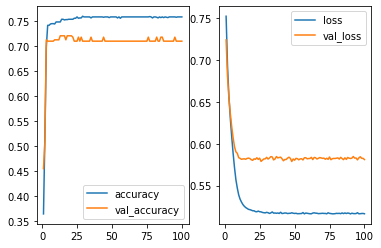

In [287]:
metrics = ["accuracy","loss"]
epochs = len(history["accuracy"])
axis_x = range(1,epochs+1)

# plt.figure(1, figsize=(24,10))

print(model.evaluate(gmm_X_test,y_test))

n_rows = 1
n_cols = 2
if len(metrics) > 2:
    n_rows = 2

for index, metric in enumerate(metrics):
    plt.subplot(n_rows, n_cols, index+1)
    
    plt.plot(axis_x, history[metric], label=metric)
    plt.plot(axis_x, history[f"val_{metric}"], label=f"val_{metric}")
    plt.legend()

plt.show()

In [257]:
data_base.head(20).to_csv("facecheck.csv",index=False)

## Neural Network

### Experiment

Text(0.5, 1.0, 'Learning rate vs. loss')

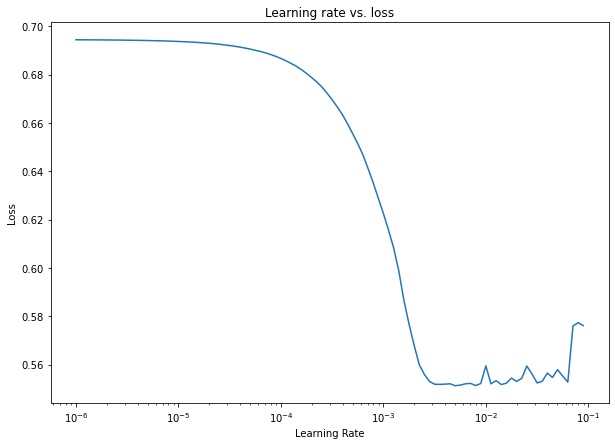

In [294]:
# Explorate the neural network
# input_shape = (len(X_train[0]),)

model = Sequential(
    layers=[
        Dense(4, kernel_initializer='he_normal', activation="relu"),
        Dense(2, kernel_initializer='he_normal', activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)
# adam = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=['accuracy'])

EPOCHS = 100

epoch_function = lambda epoch: 1e-6 * 10**(epoch/20)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(epoch_function) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

h = model.fit(
    gmm_X_train, 
    y_train,
    epochs=EPOCHS,
    batch_size=64,
    # validation_split=0.2,
    verbose=0,
    callbacks=[lr_scheduler]
)
history = h.history
# pd.DataFrame(history).plot(figsize=(10,7), xlabel="epochs")
lrs = list(map(epoch_function,np.arange(EPOCHS)))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

### Model

20/20 [==============================] - 0s 1ms/step - loss: 0.6474 - accuracy: 0.6516
[0.6473698019981384, 0.6516128778457642]


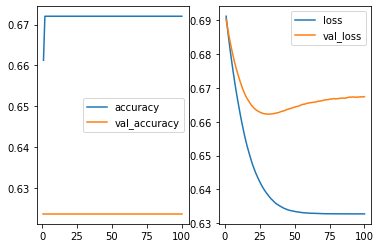

In [295]:

model = Sequential(
    layers=[
        Dense(4, kernel_initializer='he_normal', activation="relu"),
        Dense(2, kernel_initializer='he_normal', activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)
adam = Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

EPOCHS = 100

h = model.fit(gmm_X_train, y_train, epochs=EPOCHS, batch_size=64, validation_split=0.2, verbose=0)
history = h.history

metrics = ["accuracy","loss"]
epochs = len(history["accuracy"])
axis_x = range(1,epochs+1)

# plt.figure(1, figsize=(24,10))

print(model.evaluate(gmm_X_test,y_test))

n_rows = 1
n_cols = 2
if len(metrics) > 2:
    n_rows = 2

for index, metric in enumerate(metrics):
    plt.subplot(n_rows, n_cols, index+1)
    
    plt.plot(axis_x, history[metric], label=metric)
    plt.plot(axis_x, history[f"val_{metric}"], label=f"val_{metric}")
    plt.legend()

plt.show()
# model.summary()

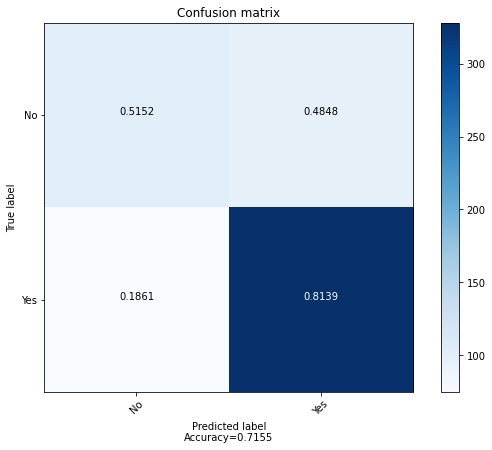

Predicted,0,1
Actual,,
0,102,96
1,75,328


In [26]:
predictions = model.predict(X_test).reshape((len(y_test),))
predictions = list(map(lambda y: 1 if y > 0.5 else 0, predictions))
cm = pd.crosstab(
    pd.Series(y_test.reshape((len(y_test),)), name='Actual'), 
    pd.Series(predictions, name='Predicted')
)
plot_confusion_matrix(cm.to_numpy(), ["No","Yes"])
cm

<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATION</p>

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DISCUSSION</p>

## Patterns study

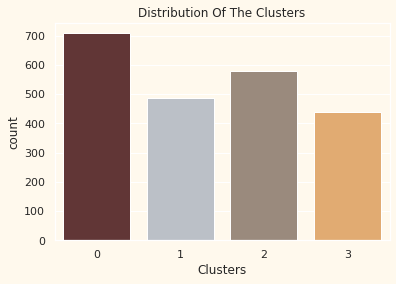

In [76]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X_clean["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

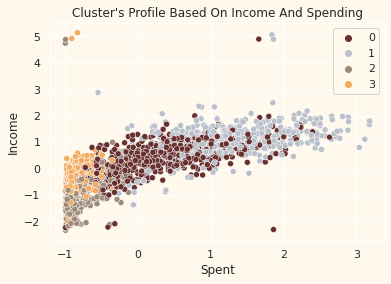

In [77]:
pl = sns.scatterplot(data = X_clean,x=X_clean["Spent"], y=X_clean["Income"],hue=X_clean["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## Profiling

## Conclusions
- 

<a id="8"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DEPLOYMENT AND ENSEMBLES</p>

<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>

[Return to table of contents](#top)